In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

In [42]:
df = pd.read_csv('heart_failure_clinical_records.csv')

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [43]:
df.shape

(5000, 13)

In [44]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

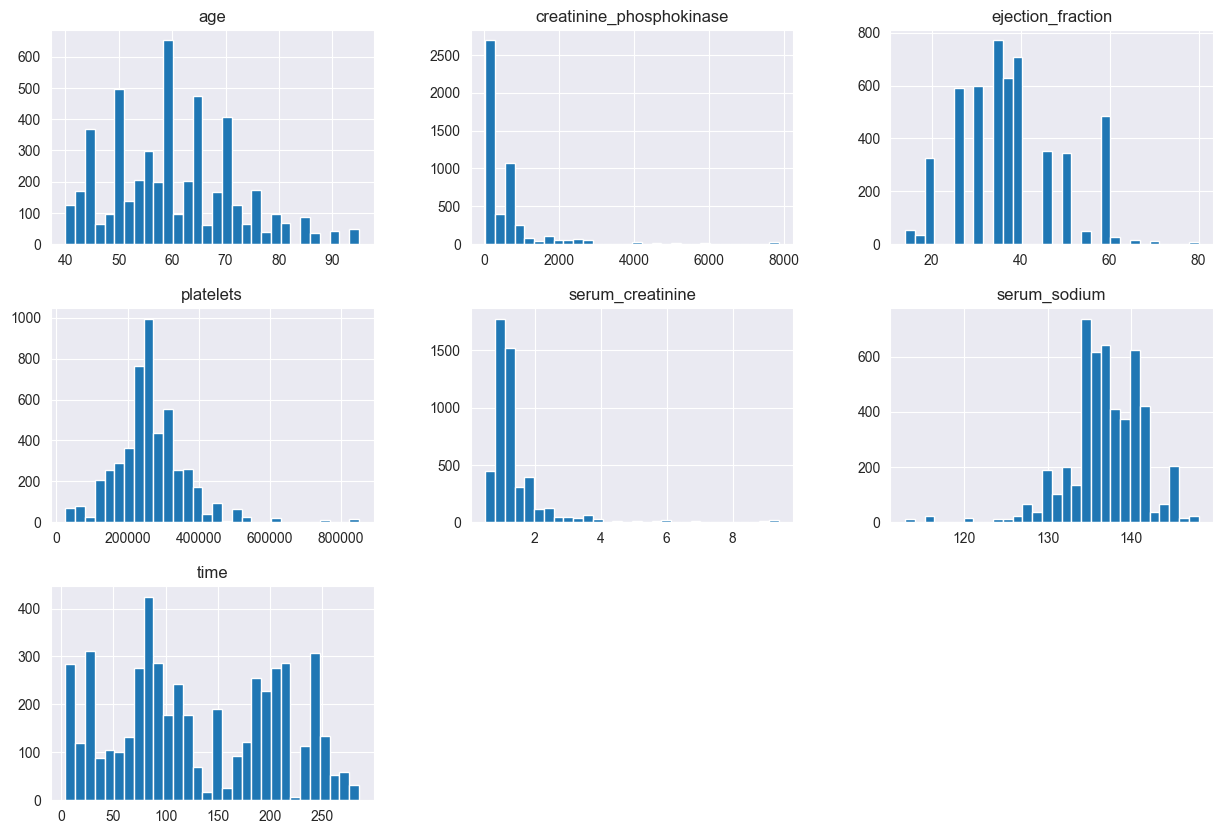

In [45]:
df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']].hist(bins=30, figsize=(15, 10))
plt.show()

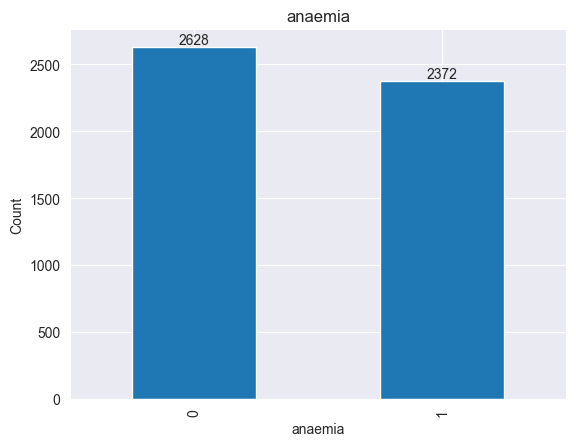

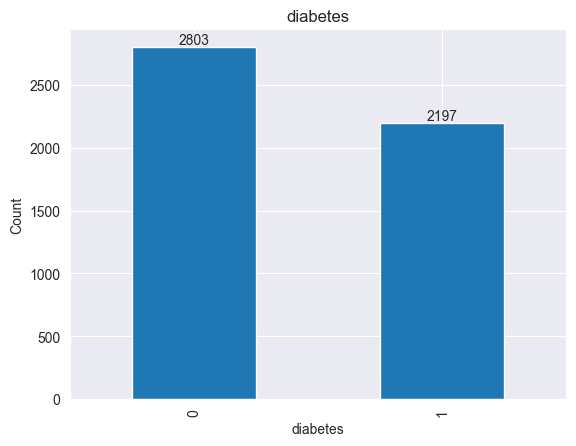

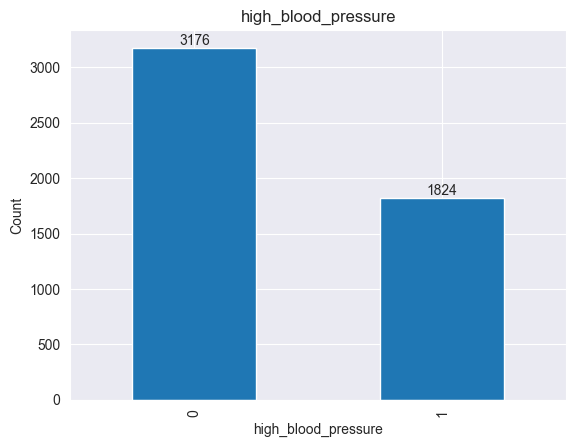

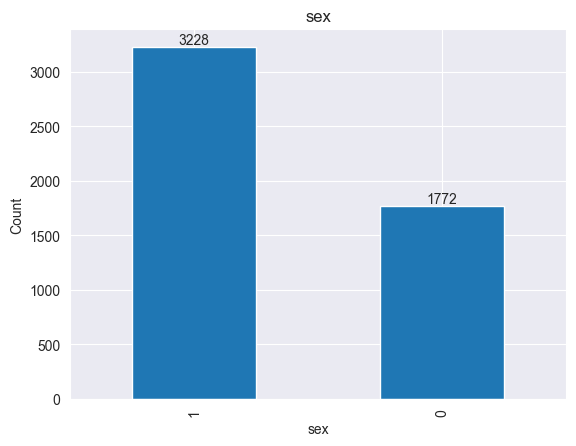

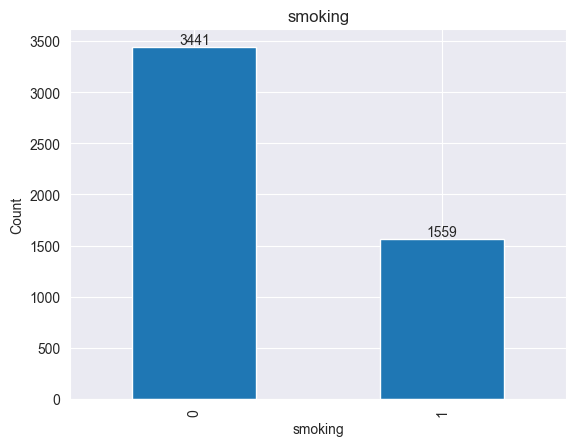

In [46]:
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for feature in binary_features:
    ax = df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.ylabel('Count')   # Label for the y-axis

    # Adding value labels on each bar
    for i in ax.containers:
        ax.bar_label(i)

    plt.show()

In [47]:
X = df.drop(columns=['death_event'])
y = df['death_event']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((3750, 12), (1250, 12))

In [48]:

# Standardize the continuous features (scale down the data)
continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
4884,0.732160,0,-0.026465,0,-1.552944,0,0.007164,-0.175559,-0.621585,1,1,-0.750031
3163,0.219926,1,1.123571,0,0.638631,0,-1.943303,-0.661718,0.047521,1,0,0.705001
490,0.390671,0,-0.536945,0,-1.114629,0,0.401300,3.519248,-1.513727,1,0,0.975405
862,-0.036191,1,-0.498125,1,1.953576,1,1.128935,-0.661718,-0.175514,0,0,-0.479627
1740,-0.036191,1,-0.295292,1,1.953576,0,1.907101,-0.272791,-1.290691,1,1,-1.561243


In [49]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred_nb = model_nb.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       881
           1       0.75      0.47      0.58       369

    accuracy                           0.80      1250
   macro avg       0.78      0.70      0.72      1250
weighted avg       0.79      0.80      0.78      1250



In [50]:
probabilities_nb = model_nb.predict_proba(X_test)[:,1]

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, probabilities_nb)

roc_auc_nb = auc(fpr_nb, tpr_nb)

print(f'GaussianNB AUC area: {roc_auc_nb}')

GaussianNB AUC area: 0.8790854196850709


In [51]:
desired_recall_nb = 0.85

closet_index_nb = np.argmin(np.abs(tpr_nb - desired_recall_nb))

optimal_threshold_nb = thresholds_nb[closet_index_nb]
optimal_fpr_nb = fpr_nb[closet_index_nb]

optimal_threshold_nb,   optimal_fpr_nb

(np.float64(0.09000947872507015), np.float64(0.28944381384790013))

In [52]:
optimal_y_pred_nb = (probabilities_nb > optimal_threshold_nb).astype(int)

print(classification_report(y_test, optimal_y_pred_nb))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       881
           1       0.55      0.85      0.67       369

    accuracy                           0.75      1250
   macro avg       0.73      0.78      0.73      1250
weighted avg       0.81      0.75      0.76      1250



In [53]:
model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       881
           1       0.74      0.76      0.75       369

    accuracy                           0.85      1250
   macro avg       0.82      0.82      0.82      1250
weighted avg       0.85      0.85      0.85      1250



In [54]:
probabilities_svm = model_svm.predict_proba(X_test)[:,1]

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probabilities_svm)

roc_auc_svm = auc(fpr_svm, tpr_svm)

print(f'SVC AUC area: {roc_auc_svm}')

SVC AUC area: 0.8932077061973798


In [55]:
desired_recall_svm = 0.90

closet_index_svm = np.argmin(np.abs(tpr_svm - desired_recall_svm))

optimal_threshold_svm = thresholds_svm[closet_index_svm]
optimal_fpr_svm = fpr_svm[closet_index_svm]

optimal_threshold_svm,   optimal_fpr_svm

(np.float64(0.184181240285259), np.float64(0.3348467650397276))

In [56]:
optimal_y_pred_svm = (probabilities_svm > optimal_threshold_svm).astype(int)

print(classification_report(y_test, optimal_y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       881
           1       0.53      0.89      0.66       369

    accuracy                           0.73      1250
   macro avg       0.73      0.78      0.72      1250
weighted avg       0.81      0.73      0.74      1250



In [57]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       881
           1       0.99      0.99      0.99       369

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [58]:
probabilities_xgb = model_xgb.predict_proba(X_test)[:,1]

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, probabilities_xgb)

roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

print(f'XGBClassifier AUC area: {roc_auc_xgb}')

XGBClassifier AUC area: 0.9991971429362421


In [59]:
desired_recall_xgb = 1.0

closet_index_xgb = np.argmin(np.abs(tpr_xgb - desired_recall_xgb))

optimal_threshold_xgb = thresholds_xgb[closet_index_xgb]
optimal_fpr_xgb = fpr_xgb[closet_index_xgb]

optimal_threshold_xgb,   optimal_fpr_xgb

(np.float32(0.0075067715), np.float64(0.07945516458569807))

In [60]:
optimal_y_pred_xgb = (probabilities_xgb > optimal_threshold_xgb).astype(int)

print(classification_report(y_test, optimal_y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       881
           1       0.84      1.00      0.91       369

    accuracy                           0.94      1250
   macro avg       0.92      0.96      0.94      1250
weighted avg       0.95      0.94      0.94      1250



In [61]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.97      0.97      0.97       369

    accuracy                           0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250



In [62]:
probabilities_dt = model_dt.predict_proba(X_test)[:,1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probabilities_dt)

roc_auc_dt = auc(fpr_dt, tpr_dt)

print(f'DecisionTreeClassifier AUC area: {roc_auc_dt}')

DecisionTreeClassifier AUC area: 0.9796240414163506


In [63]:
desired_recall_dt = 1

closet_index_dt = np.argmin(np.abs(tpr_dt - desired_recall_dt))

optimal_threshold_dt = thresholds_dt[closet_index_dt]
optimal_fpr_dt = fpr_dt[closet_index_dt]

optimal_threshold_dt,   optimal_fpr_dt

(np.float64(0.0), np.float64(1.0))

In [64]:
optimal_y_pred_dt = (probabilities_dt > optimal_threshold_dt).astype(int)

print(classification_report(y_test, optimal_y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.97      0.97      0.97       369

    accuracy                           0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250



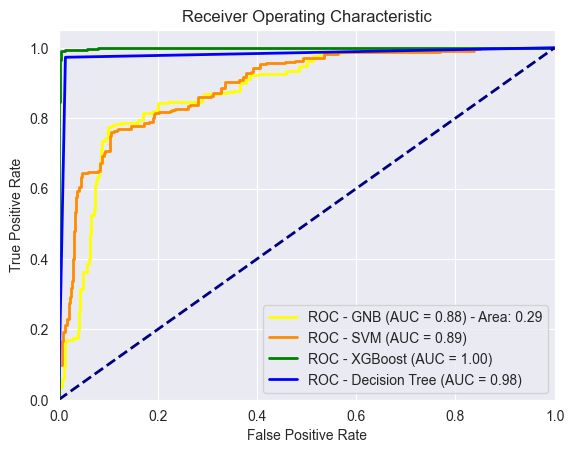

In [65]:
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label=f'ROC - GNB (AUC = {roc_auc_nb:.2f}) - Area: {optimal_fpr_nb:.2f}')
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC - SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'ROC - XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'ROC - Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [66]:
df['death_event'].value_counts()

death_event
0    3432
1    1568
Name: count, dtype: int64